In [2]:
import scipy.optimize as opt
import numpy.polynomial.polynomial as poly
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import PIL.Image as Img
import PIL.ImageDraw as ImgDraw
from IPython.display import Image, display

In [3]:
tolerance = 1e-6
maxiter = 1e2

In [4]:
def plot_for(p, min_x = -5., max_x = 5., steps=100):
    der = p.deriv()
    roots = p.roots()

    def newton_find_root(point):
        val = p(point)
        result = 0
        while abs(pow(val, 2).real) > tolerance and result < maxiter:
            point = point - val/der(point)
            val = p(point)
            result += 1
        return round(point, 2), result

    Xs = np.linspace(min_x, max_x, steps)
    res = np.zeros((steps, steps, 2))
    for i in range(steps):
        for j in range(steps):
            zero, iters = newton_find_root(Xs[i] +  1.j * Xs[j])
            zero_index = np.absolute((roots-zero)).argmin()
            res[j,i] = np.array([zero_index, iters])

    return Xs, Xs, res

In [5]:
def plot_with_contourf(arg):
    Xs, Ys, res = arg
    max_iters = res[:,:,1].ravel().max()
    min_iters = res[:,:,1].ravel().min()
    to_plot = max_iters*(res[:,:,0]) + res[:,:,1]
    plt.contourf(Xs, Ys, to_plot)

In [6]:
def plot_with_pil(arg, width=150, additional_alpha=0.1):
    Xs, Ys, res = arg
    min_x = Xs[0]
    max_x = Xs[-1]
    width_x = max_x - min_x
    
    point_to_plot = lambda p: int(width*(p-min_x)/width_x)
    x_y_to_plot = lambda x,y: (point_to_plot(x), point_to_plot(y))
    unit_width = abs(point_to_plot(Xs[0]) - point_to_plot(Xs[1]))
    
    colors = [(0,0,255),
              (0,255,0),
              (255,0,0),
              (255, 0, 255),
              (0, 255, 255),
              (255, 255, 0),
              (255,125,0),
              (0, 125, 255),
              (125, 255, 0)]
    
    add_alpha = lambda c, alpha: (int(alpha*(c[0])), int(alpha*c[1]), int(alpha*c[2]))
    max_iters = res[:,:,1].ravel().max()
    min_iters = res[:,:,1].ravel().min()
    width_iters = max_iters - min_iters
    res_to_rgb = lambda zero, iters: add_alpha(colors[int(zero)], additional_alpha+float(iters-min_iters)/width_iters)
    
    w, h = width, width

    # create a new image with a black background

    img = Img.new('RGB',(w+1,h+1),(0,0,0))
    draw = ImgDraw.Draw(img)

    for i in range(len(Xs)):
        for j in range(len(Ys))[::-1]:
            x,y = x_y_to_plot(Xs[i],Ys[j])
            c = res_to_rgb(*res[j,i])
            draw.ellipse((x-unit_width, y-unit_width, x+unit_width, y+unit_width), fill=c)

    # draw axis        
    draw.line((0,h/2,w,h/2),fill=(255,255,255))
    draw.line((w/2,0,w/2,h),fill=(255,255,255))

    display(img)

In [7]:
p = poly.Polynomial((1+2j,0,0,10,2))

In [8]:
print(p.roots())

[-4.99602922+0.00803832j -0.58560608-0.23870383j  0.11517813+0.58990802j
  0.46645717-0.3592425j ]


In [9]:
%time res = plot_for(p, steps=200)

CPU times: user 13.4 s, sys: 16.7 ms, total: 13.4 s
Wall time: 13.4 s


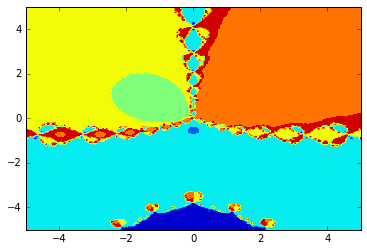

In [174]:
plot_with_contourf(res)

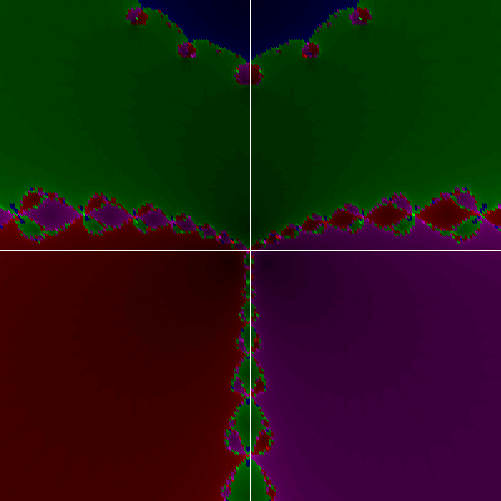

In [178]:
plot_with_pil(res, width = 500, additional_alpha=0.1)

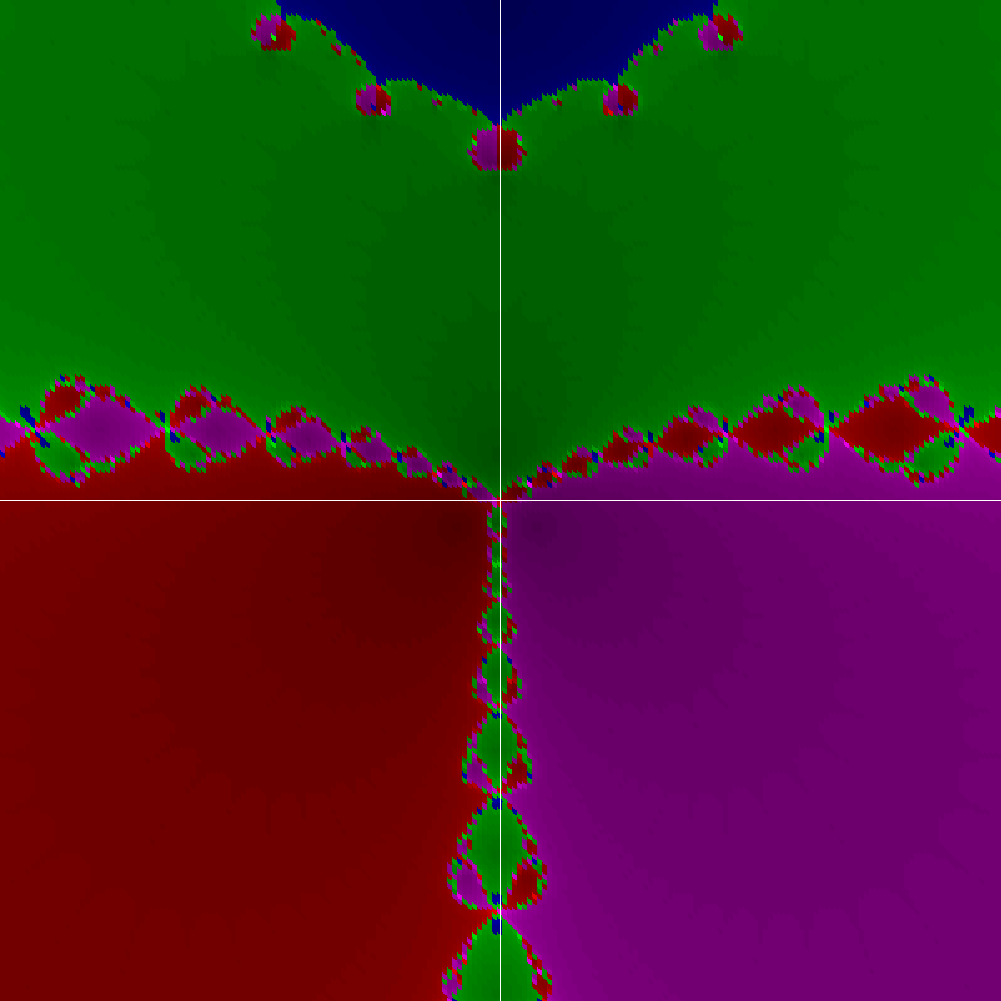

In [177]:
plot_with_pil(res, width = 1000, additional_alpha=0.3)